**A) installing and importing yfinance**

In [1]:
## pip install yfinance
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


**B) downloading test and train data**

In [2]:
btc_train_data = yf.download('BTC-USD', start='2019-01-01', end='2024-01-01')
btc_train_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [3]:
current_date = datetime.now().strftime('%Y-%m-%d')
btc_test_data = yf.download('BTC-USD', start='2024-01-01', end=current_date)
btc_test_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
...,...,...,...,...,...,...
2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,63113.230469,17334827993
2024-04-29,63106.363281,64174.878906,61795.457031,63841.121094,63841.121094,26635912073
2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,60636.855469,37840840057


**C) Plotting data**

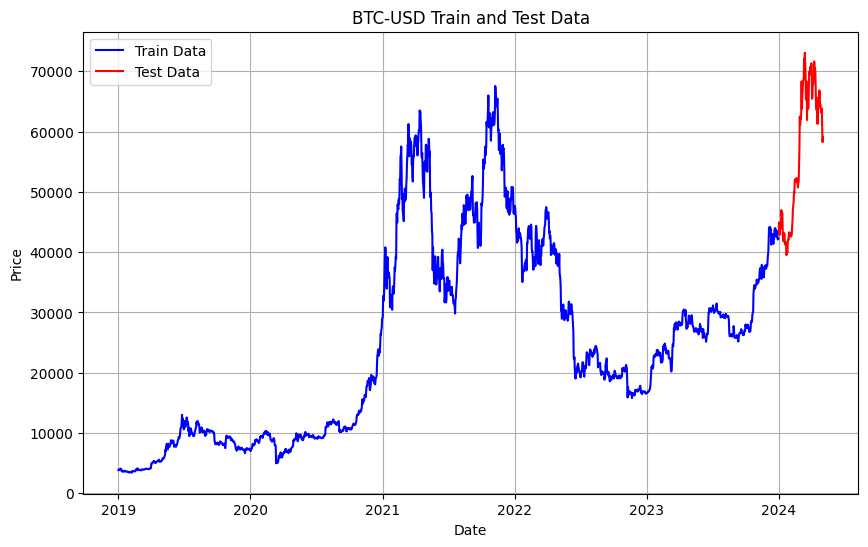

In [4]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot train data
plt.plot(btc_train_data.index, btc_train_data['Close'], color='blue', label='Train Data')

# Plot test data
plt.plot(btc_test_data.index, btc_test_data['Close'], color='red', label='Test Data')

plt.title('BTC-USD Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**D) Normalizing train data**

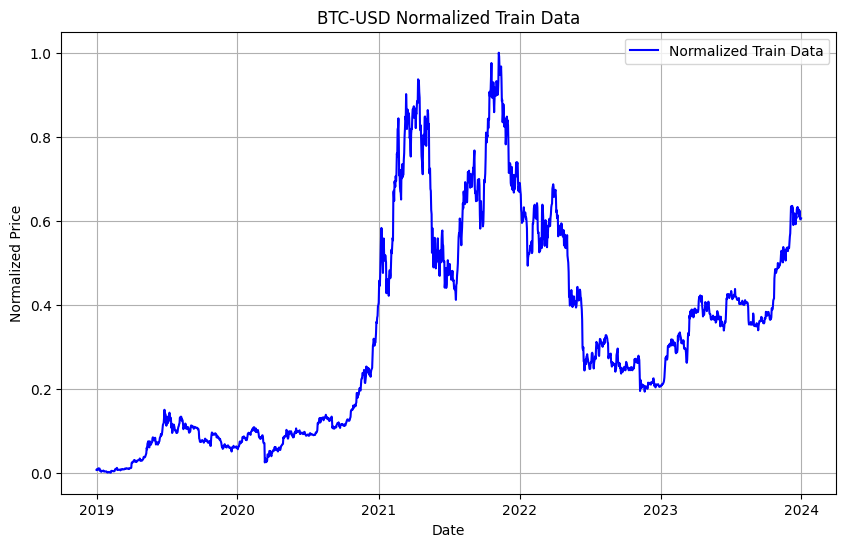

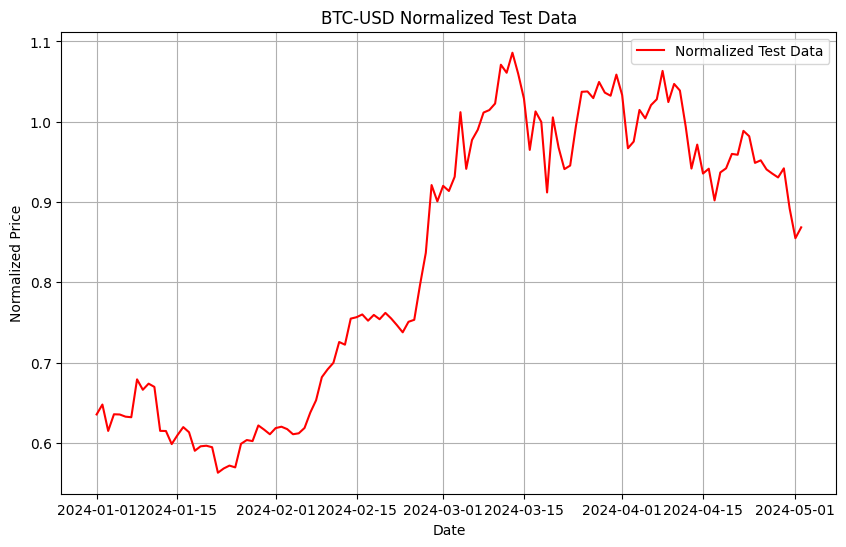

In [5]:
train_close_prices = btc_train_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
normalized_train_data = scaler.fit_transform(train_close_prices)
plt.figure(figsize=(10, 6))

# Plot normalized train data
plt.plot(btc_train_data.index, normalized_train_data, color='blue', label='Normalized Train Data')

plt.title('BTC-USD Normalized Train Data')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


## Normalizing Test data
test_close_prices = btc_test_data['Close'].values.reshape(-1, 1)
normalized_test_data = scaler.transform(test_close_prices)

# Plot normalized test data
plt.figure(figsize=(10, 6))
plt.plot(btc_test_data.index, normalized_test_data, color='red', label='Normalized Test Data')
plt.title('BTC-USD Normalized Test Data')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

**E) Provide data for model**

In [6]:

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Number of past data points to consider for prediction
look_back = 60

# Creating input and output data for the model
X_train, y_train = create_dataset(normalized_train_data, look_back)

# Print the shape of the training data
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)


X_train.shape: (1766, 60)
y_train.shape: (1766,)


**F,G) Make LSTM Model and Fit our model with details mentioned in the question**

In [7]:
# Create a sequential model
model = Sequential()

# Adding the first LSTM layer with 50 units and a dropout rate of 0.2
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding additional LSTM layers with dropout (similar to the image)
for _ in range(2):
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

# The final LSTM layer does not return sequences
model.add(LSTM(units=50))


# Adding a dense output layer
model.add(Dense(units=1))

# Compile the model with specified optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model architecture
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_train, y_train))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

**H) First Normalizing Test data and then use 60 days as loopback and then predict values using our model and then plot it.**

In [8]:
# Number of past data points to consider for prediction
look_back = 60

# Creating input and output data for the model
X_test, y_test = create_dataset(normalized_test_data, look_back)

# Print the shape of the testing data
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


X_test.shape: (63, 60)
y_test.shape: (63,)


2/2 [==============================] - 1s 10ms/step


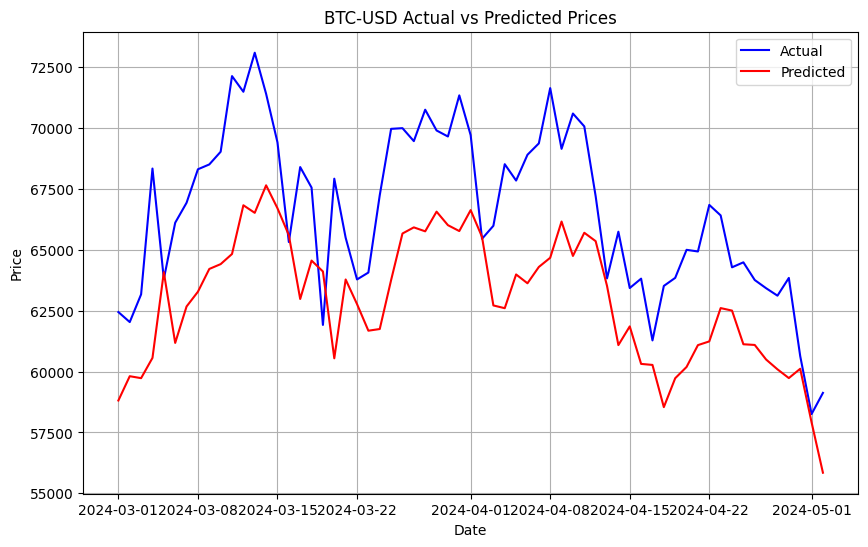

In [9]:
# Make predictions on the test data
predicted_values = model.predict(X_test)

# Inverse transform the predicted values to their original scale
predicted_values = scaler.inverse_transform(predicted_values)

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(btc_test_data.index[look_back:], btc_test_data['Close'][look_back:], color='blue', label='Actual')

# Plot predicted values
plt.plot(btc_test_data.index[look_back:], predicted_values, color='red', label='Predicted')

plt.title('BTC-USD Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
